# Change point detection

- Example from Coal mining disasters : http://docs.pymc.io/notebooks/getting_started.html?highlight=missing

Important
- Handling of missing values
- Switching model definition


$$ e \sim exp(1) $$

$$ l \sim exp(1) $$

$$ s \sim Unif(t_l, t_h) $$

$$ r_t = \left\{
  \begin{array}{rcr}
    l, \text{if}\ t > s \\
    e, \text{if}\ t < s \\
  \end{array}
\right.
$$

$$ D_t \sim Poission(r_t)$$

where 

$e$ - early rate

$l$ - late rate

$s$ - switching point in time

$t_l, t_h$ - begining of time, end of time

$r_t$ - real rate of deaths

$D_t$ - observed rate of deaths


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:,.3f}'.format

pd.set_option('max_colwidth',100)

from matplotlib import pylab as plt
import matplotlib
matplotlib.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = 10, 8

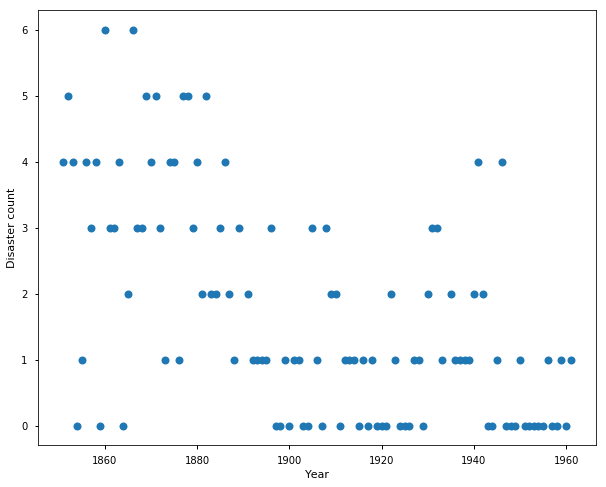

In [2]:
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
year = np.arange(1851, 1962)

plt.plot(year, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year")

In [11]:
import pymc3 as pm

with pm.Model() as disaster_model:


    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)
    
    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1950)
    
    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= year, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

In [14]:
with disaster_model:
    trace = pm.sample(100000)

Assigned NUTS to early_rate_log__
Assigned NUTS to late_rate_log__
Assigned Metropolis to switchpoint
Assigned Metropolis to disasters_missing
100%|█████████▉| 100489/100500 [06:06<00:00, 274.43it/s]/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.516996974159, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 16842 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 100500/100500 [06:06<00:00, 274.42it/s]


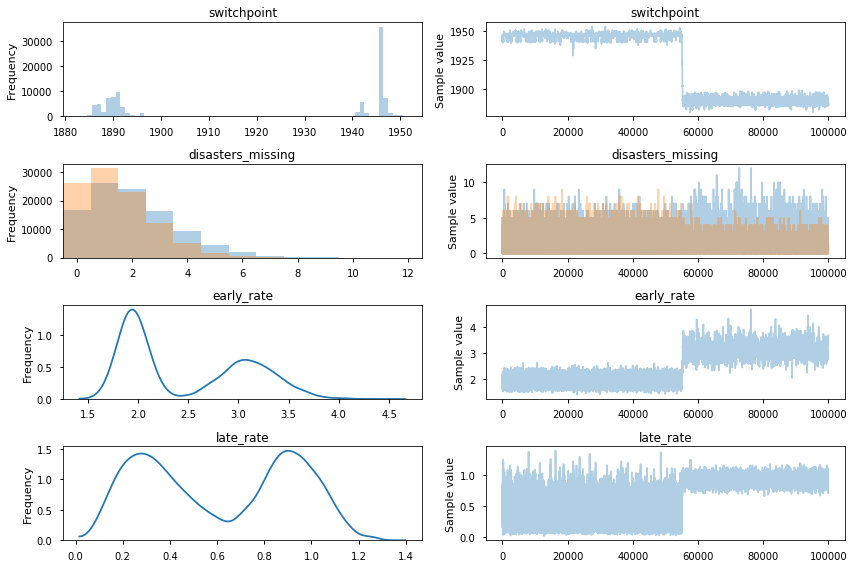

In [15]:
pm.traceplot(trace);

In [8]:
pm.DiscreteUniform?